In [36]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn components
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter optimization
import optuna

# Surrogate model 
import xgboost as xgb

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [134]:
df = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Typhoon Name             1776 non-null   object 
 1   Year                     1776 non-null   int64  
 2   Region                   1776 non-null   int64  
 3   Province                 1776 non-null   object 
 4   City/Municipality        1776 non-null   object 
 5   Families                 1776 non-null   int64  
 6   Person                   1776 non-null   int64  
 7   Brgy                     1776 non-null   int64  
 8   Dead                     1776 non-null   int64  
 9   Injured/Ill              1776 non-null   int64  
 10  Missing                  1776 non-null   int64  
 11  Totally                  1776 non-null   int64  
 12  Partially                1776 non-null   int64  
 13  Total                    1776 non-null   int64  
 14  Quantity                

In [136]:
df.isnull().sum()

Typhoon Name               0
Year                       0
Region                     0
Province                   0
City/Municipality          0
Families                   0
Person                     0
Brgy                       0
Dead                       0
Injured/Ill                0
Missing                    0
Totally                    0
Partially                  0
Total                      0
Quantity                   0
Cost                       0
Nearest_Station            0
Station_Province           0
Distance_km                0
PAR_START                  0
PAR_END                    0
Duration_in_PAR_Hours      0
Max_Sustained_Wind_kph     0
Typhoon_Type               0
Max_24hr_Rainfall_mm       0
Total_Storm_Rainfall_mm    0
Min_Pressure_hPa           0
Weather_Station_Mapped     0
Weather_Records_Found      0
Weather_Days_Covered       0
dtype: int64

In [137]:
df.columns

Index(['Typhoon Name', 'Year', 'Region', 'Province', 'City/Municipality',
       'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill', 'Missing',
       'Totally', 'Partially', 'Total', 'Quantity', 'Cost', 'Nearest_Station',
       'Station_Province', 'Distance_km', 'PAR_START', 'PAR_END',
       'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Typhoon_Type',
       'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa',
       'Weather_Station_Mapped', 'Weather_Records_Found',
       'Weather_Days_Covered'],
      dtype='object')

In [138]:
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [139]:
df.drop(columns=['Quantity', 'PAR_START', 'PAR_END', 'Weather_Days_Covered', 'Total', 'Weather_Station_Mapped', 'Station_Province', 'Nearest_Station', 'Year', 'Typhoon Name', 'City/Municipality', 'Province'], inplace=True)
df.head()

,Region,Families,Person,Brgy,Dead,Injured/Ill,Missing,Totally,Partially,Cost,Distance_km,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Records_Found
0,2,3608,11120,6,0,0,0,0,0,2646179.36,2.497504,133.0,195,STY,25.6,39.00,977.1,6
1,2,968,3028,5,0,0,0,0,0,494592.00,3.204943,133.0,195,STY,20.3,32.71,1000.5,6
2,2,444,1532,4,0,0,0,0,0,227328.00,9.470554,133.0,195,STY,25.6,39.00,977.1,6
3,2,575,1792,4,0,0,0,0,0,291082.96,4.890816,133.0,195,STY,25.6,39.00,977.1,6
4,2,575,1955,6,0,0,0,0,0,296521.75,19.891231,133.0,195,STY,25.6,39.00,977.1,6


In [43]:
df.columns

Index(['Region', 'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill',
       'Missing', 'Totally', 'Partially', 'Cost', 'Distance_km',
       'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Typhoon_Type',
       'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa',
       'Weather_Records_Found'],
      dtype='object')

## PCA Generalization Functions
Functions for performing Principal Component Analysis on the typhoon impact dataset.

In [44]:
def prepare_pca_features(input_dataframe: pd.DataFrame, categorical_columns: list = None) -> tuple:
    """
    Prepare features for PCA by separating numerical and categorical columns.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        The input dataframe containing features
    categorical_columns : list, optional
        List of categorical column names. If None, auto-detects object dtype columns.
    
    Returns:
    --------
    tuple: (numerical_features_df, categorical_features_df, numerical_column_names)
    """
    if categorical_columns is None:
        categorical_columns = input_dataframe.select_dtypes(include=['object']).columns.tolist()
    
    numerical_column_names = [col for col in input_dataframe.columns if col not in categorical_columns]
    
    numerical_features_df = input_dataframe[numerical_column_names].copy()
    categorical_features_df = input_dataframe[categorical_columns].copy() if categorical_columns else pd.DataFrame()
    
    return numerical_features_df, categorical_features_df, numerical_column_names


def scale_numerical_features(numerical_features_df: pd.DataFrame) -> tuple:
    """
    Scale numerical features using StandardScaler.
    
    Parameters:
    -----------
    numerical_features_df : pd.DataFrame
        DataFrame containing only numerical features
    
    Returns:
    --------
    tuple: (scaled_features_array, fitted_scaler_object)
    """
    feature_scaler_object = StandardScaler()
    scaled_features_array = feature_scaler_object.fit_transform(numerical_features_df)
    
    return scaled_features_array, feature_scaler_object


def perform_pca_analysis(
    scaled_features_array: np.ndarray,
    n_components: int = None,
    variance_threshold: float = 0.95
) -> tuple:
    """
    Perform PCA analysis on scaled features.
    
    Parameters:
    -----------
    scaled_features_array : np.ndarray
        Scaled numerical features array
    n_components : int, optional
        Number of components to keep. If None, uses variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold to determine n_components if n_components is None.
    
    Returns:
    --------
    tuple: (pca_transformed_array, fitted_pca_object, explained_variance_ratios)
    """
    # First fit PCA to determine optimal components if not specified
    if n_components is None:
        preliminary_pca_object = PCA()
        preliminary_pca_object.fit(scaled_features_array)
        cumulative_variance_array = np.cumsum(preliminary_pca_object.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance_array >= variance_threshold) + 1
        del preliminary_pca_object  # Clean up to avoid memory leak
    
    # Perform final PCA with determined number of components
    final_pca_object = PCA(n_components=n_components)
    pca_transformed_array = final_pca_object.fit_transform(scaled_features_array)
    explained_variance_ratios = final_pca_object.explained_variance_ratio_
    
    return pca_transformed_array, final_pca_object, explained_variance_ratios


def create_pca_dataframe(
    pca_transformed_array: np.ndarray,
    n_components: int
) -> pd.DataFrame:
    """
    Create a DataFrame from PCA transformed array with proper column names.
    
    Parameters:
    -----------
    pca_transformed_array : np.ndarray
        Array of PCA transformed features
    n_components : int
        Number of PCA components
    
    Returns:
    --------
    pd.DataFrame: DataFrame with PCA components as columns
    """
    pca_column_names = [f'PC{i+1}' for i in range(n_components)]
    pca_features_df = pd.DataFrame(pca_transformed_array, columns=pca_column_names)
    
    return pca_features_df


def plot_pca_variance_explanation(
    fitted_pca_object: PCA,
    figure_title: str = 'PCA Variance Explanation'
) -> None:
    """
    Plot the explained variance ratio for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    figure_title : str
        Title for the plot
    """
    variance_ratios_array = fitted_pca_object.explained_variance_ratio_
    cumulative_variance_array = np.cumsum(variance_ratios_array)
    n_components_count = len(variance_ratios_array)
    
    pca_variance_fig, pca_variance_axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Individual variance plot
    pca_variance_axes[0].bar(range(1, n_components_count + 1), variance_ratios_array, alpha=0.7, color='steelblue')
    pca_variance_axes[0].set_xlabel('Principal Component')
    pca_variance_axes[0].set_ylabel('Explained Variance Ratio')
    pca_variance_axes[0].set_title('Individual Explained Variance')
    pca_variance_axes[0].set_xticks(range(1, n_components_count + 1))
    
    # Cumulative variance plot
    pca_variance_axes[1].plot(range(1, n_components_count + 1), cumulative_variance_array, 'bo-', linewidth=2, markersize=8)
    pca_variance_axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    pca_variance_axes[1].set_xlabel('Number of Components')
    pca_variance_axes[1].set_ylabel('Cumulative Explained Variance')
    pca_variance_axes[1].set_title('Cumulative Explained Variance')
    pca_variance_axes[1].set_xticks(range(1, n_components_count + 1))
    pca_variance_axes[1].legend()
    pca_variance_axes[1].grid(True, alpha=0.3)
    
    pca_variance_fig.suptitle(figure_title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Clean up
    plt.close(pca_variance_fig)


def get_pca_feature_loadings(
    fitted_pca_object: PCA,
    feature_names_list: list
) -> pd.DataFrame:
    """
    Get the feature loadings (component weights) for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    feature_names_list : list
        List of original feature names
    
    Returns:
    --------
    pd.DataFrame: DataFrame with feature loadings for each component
    """
    n_components_count = fitted_pca_object.n_components_
    component_names_list = [f'PC{i+1}' for i in range(n_components_count)]
    
    feature_loadings_df = pd.DataFrame(
        fitted_pca_object.components_.T,
        columns=component_names_list,
        index=feature_names_list
    )
    
    return feature_loadings_df


def run_complete_pca_pipeline(
    input_dataframe: pd.DataFrame,
    n_components: int = None,
    variance_threshold: float = 0.95,
    categorical_columns: list = None,
    show_plots: bool = True,
    return_loadings: bool = True
) -> dict:
    """
    Run the complete PCA pipeline on the input dataframe.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        Input dataframe with features
    n_components : int, optional
        Number of PCA components. If None, auto-determined by variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold for auto-determining n_components
    categorical_columns : list, optional
        List of categorical column names to exclude from PCA
    show_plots : bool, default=True
        Whether to display variance explanation plots
    return_loadings : bool, default=True
        Whether to include feature loadings in the result
    
    Returns:
    --------
    dict: Dictionary containing:
        - 'pca_dataframe': DataFrame with PCA components
        - 'pca_object': Fitted PCA object
        - 'scaler_object': Fitted StandardScaler object
        - 'explained_variance': Array of explained variance ratios
        - 'total_variance_explained': Total variance explained by components
        - 'feature_loadings': DataFrame of feature loadings (if return_loadings=True)
        - 'numerical_features': List of numerical feature names used
    """
    # Step 1: Prepare features
    numerical_features_df, categorical_features_df, numerical_column_names = prepare_pca_features(
        input_dataframe, categorical_columns
    )
    
    print(f"Numerical features for PCA: {len(numerical_column_names)}")
    print(f"Features: {numerical_column_names}")
    
    # Step 2: Scale features
    scaled_features_array, feature_scaler_object = scale_numerical_features(numerical_features_df)
    
    # Step 3: Perform PCA
    pca_transformed_array, fitted_pca_object, explained_variance_ratios = perform_pca_analysis(
        scaled_features_array, n_components, variance_threshold
    )
    
    actual_n_components = fitted_pca_object.n_components_
    total_variance_explained = np.sum(explained_variance_ratios)
    
    print(f"\nPCA Results:")
    print(f"Number of components: {actual_n_components}")
    print(f"Total variance explained: {total_variance_explained:.4f} ({total_variance_explained*100:.2f}%)")
    
    # Step 4: Create PCA DataFrame
    pca_features_df = create_pca_dataframe(pca_transformed_array, actual_n_components)
    
    # Step 5: Plot variance explanation
    if show_plots:
        plot_pca_variance_explanation(fitted_pca_object, 'Typhoon Impact Data - PCA Variance Explanation')
    
    # Prepare result dictionary
    pca_result_dict = {
        'pca_dataframe': pca_features_df,
        'pca_object': fitted_pca_object,
        'scaler_object': feature_scaler_object,
        'explained_variance': explained_variance_ratios,
        'total_variance_explained': total_variance_explained,
        'numerical_features': numerical_column_names
    }
    
    # Step 6: Get feature loadings if requested
    if return_loadings:
        feature_loadings_df = get_pca_feature_loadings(fitted_pca_object, numerical_column_names)
        pca_result_dict['feature_loadings'] = feature_loadings_df
    
    # Clean up intermediate variables
    del scaled_features_array, pca_transformed_array
    
    return pca_result_dict

Numerical features for PCA: 17
Features: ['Region', 'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill', 'Missing', 'Totally', 'Partially', 'Cost', 'Distance_km', 'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa', 'Weather_Records_Found']

PCA Results:
Number of components: 13
Total variance explained: 0.9724 (97.24%)


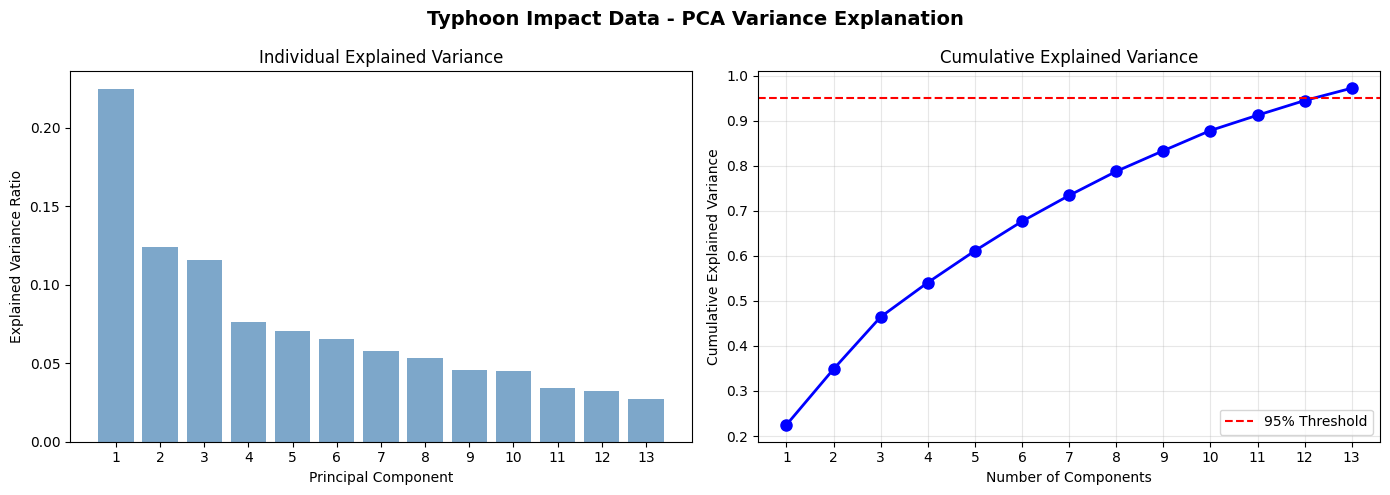

In [45]:
# Run PCA pipeline on typhoon impact data
typhoon_pca_results = run_complete_pca_pipeline(
    input_dataframe=df,
    n_components=None,  # Auto-determine based on variance threshold
    variance_threshold=0.95,
    categorical_columns=['Typhoon_Type'],  # Exclude categorical columns
    show_plots=True,
    return_loadings=True
)

In [46]:
# Access PCA results
typhoon_pca_df = typhoon_pca_results['pca_dataframe']
typhoon_pca_loadings = typhoon_pca_results['feature_loadings']

print("PCA Transformed Data:")
display(typhoon_pca_df.head(10))

print("\nFeature Loadings (Component Weights):")
display(typhoon_pca_loadings)

PCA Transformed Data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.185911,1.133707,-0.475442,-1.400507,0.997634,0.587441,1.875085,1.031399,0.159019,-1.152399,-1.486495,0.969205,0.571816
1,-0.539211,1.599039,-0.740037,-1.074705,0.339545,0.335444,1.780994,0.863044,0.096430,-0.451431,0.361309,0.063292,-0.016155
2,-0.192402,1.025005,-0.170195,-1.643113,1.338343,0.185551,1.501870,0.586444,-0.154520,-0.401316,-0.581336,0.689590,1.364237
3,-0.140423,1.015505,-0.154713,-1.655478,1.293307,0.138272,1.686309,0.673848,-0.140217,-0.441526,-0.575876,0.706572,1.358402
4,-0.114568,1.054539,-0.236924,-1.592197,1.384723,0.376050,1.088736,0.414937,-0.216858,-0.314443,-0.633428,0.763552,1.273230
5,-0.175443,1.023715,-0.169111,-1.640157,1.342709,0.175291,1.537855,0.602181,-0.150223,-0.432425,-0.596072,0.703832,1.335852
6,-0.658282,-0.462894,-0.716273,-1.367027,0.764261,0.068235,1.624969,0.954919,-0.007861,-0.356655,0.363681,-0.454683,0.212992
7,-0.748729,0.887201,1.778578,-0.763261,0.180871,0.575199,1.485799,0.725222,0.730359,-0.687770,0.707993,-0.243063,0.066528
8,-0.492748,-0.482799,3.164663,-0.626960,0.015258,0.944594,1.213497,0.826447,0.959702,-0.703707,1.038706,-0.796340,-0.487650
9,-0.688291,0.931001,1.682655,-0.686434,0.288881,0.861833,0.794385,0.422929,0.620237,-0.538563,0.646849,-0.133105,-0.068090



Feature Loadings (Component Weights):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Region,0.110487,0.031477,0.145906,0.386393,-0.199540,-0.554185,0.018685,-0.219015,-0.350760,0.307484,-0.385683,-0.198692,-0.118815
Families,0.414951,0.050029,-0.119800,0.021089,-0.354245,0.236869,-0.007422,0.150665,0.135169,0.110787,-0.148318,-0.142799,0.189396
Person,0.419638,0.051496,-0.117814,0.021821,-0.351101,0.229410,-0.009705,0.140948,0.126452,0.113905,-0.134408,-0.146753,0.175008
Brgy,0.337168,-0.039038,0.033764,-0.015775,-0.073588,0.166030,-0.009830,-0.059985,-0.403237,0.333703,0.331196,0.611400,-0.265576
Dead,0.082139,-0.042999,-0.070533,0.525718,0.180782,0.376892,0.281459,-0.297143,-0.367841,-0.298805,0.179541,-0.194062,0.270466
Injured/Ill,0.136683,0.126353,0.049150,0.242617,0.195412,-0.222621,-0.377217,0.709711,-0.268700,-0.182335,0.204535,-0.061076,0.126445
Missing,0.055095,0.002491,-0.059986,0.442496,0.495911,0.058465,0.159418,0.138374,0.475983,0.520593,-0.002995,0.052900,-0.056647
Totally,0.361291,0.074224,-0.057050,-0.105940,0.193863,-0.326223,-0.016484,-0.296728,0.242552,-0.222354,0.238070,-0.118259,-0.036279
Partially,0.396482,0.069279,-0.011929,-0.112009,0.060680,-0.265587,-0.100328,-0.239955,0.112257,0.031019,0.399572,-0.132311,0.087809
Cost,0.344002,0.030411,-0.087700,0.127845,0.143084,0.055453,0.058550,0.058730,0.092833,-0.501948,-0.418797,0.197711,-0.553126


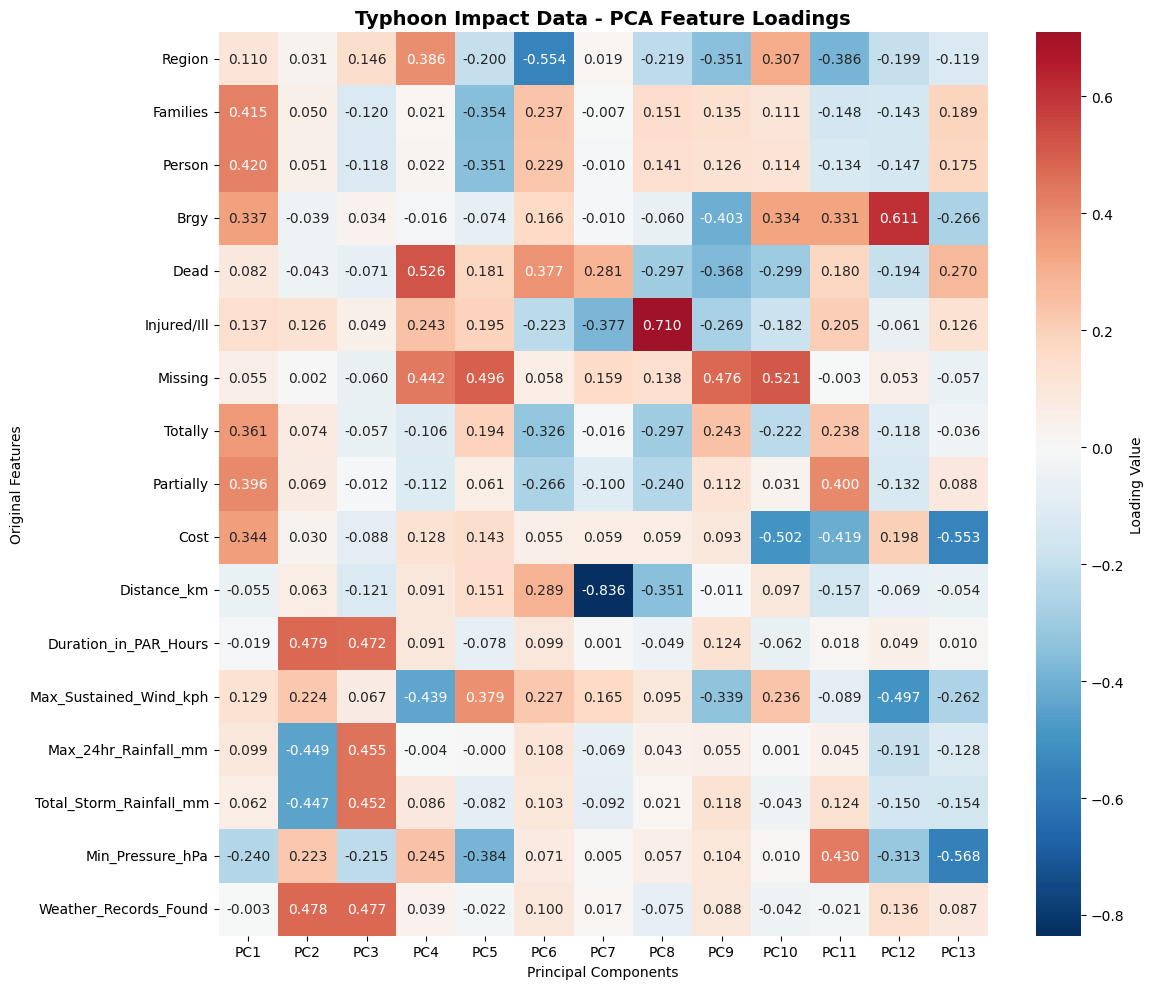

In [47]:
# Visualize feature loadings heatmap
def plot_feature_loadings_heatmap(feature_loadings_df: pd.DataFrame, figure_title: str = 'PCA Feature Loadings Heatmap') -> None:
    """
    Plot a heatmap of PCA feature loadings.
    
    Parameters:
    -----------
    feature_loadings_df : pd.DataFrame
        DataFrame containing feature loadings
    figure_title : str
        Title for the heatmap
    """
    loadings_heatmap_fig, loadings_heatmap_ax = plt.subplots(figsize=(12, 10))
    
    sns.heatmap(
        feature_loadings_df,
        annot=True,
        fmt='.3f',
        cmap='RdBu_r',
        center=0,
        ax=loadings_heatmap_ax,
        cbar_kws={'label': 'Loading Value'}
    )
    
    loadings_heatmap_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    loadings_heatmap_ax.set_xlabel('Principal Components')
    loadings_heatmap_ax.set_ylabel('Original Features')
    
    plt.tight_layout()
    plt.show()
    plt.close(loadings_heatmap_fig)

# Plot the feature loadings heatmap
plot_feature_loadings_heatmap(typhoon_pca_loadings, 'Typhoon Impact Data - PCA Feature Loadings')

In [48]:
# Summary statistics for PCA components
print("PCA Components Summary Statistics:")
display(typhoon_pca_df.describe())

print(f"\nTotal samples: {len(typhoon_pca_df)}")
print(f"Number of PCA components: {typhoon_pca_df.shape[1]}")
print(f"Total variance explained: {typhoon_pca_results['total_variance_explained']*100:.2f}%")

PCA Components Summary Statistics:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
count,1776.000000,1.776000e+03,1.776000e+03,1776.000000,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03,1776.000000,1.776000e+03,1776.000000,1.776000e+03
mean,0.000000,-1.600321e-17,-3.200643e-17,0.000000,-4.800964e-17,6.401286e-17,-4.800964e-17,-3.200643e-17,3.200643e-17,0.000000,-3.200643e-17,0.000000,-1.700342e-17
std,1.955260,1.451266e+00,1.403912e+00,1.139136,1.095050e+00,1.054446e+00,9.891524e-01,9.536139e-01,8.836811e-01,0.873547,7.604512e-01,0.744541,6.833933e-01
min,-1.695604,-5.856625e+00,-4.969306e+00,-3.749585,-9.920029e+00,-6.090735e+00,-8.974167e+00,-1.008968e+01,-1.001005e+01,-8.352485,-6.325681e+00,-4.905796,-5.759007e+00
25%,-0.877244,-7.737503e-01,-9.704106e-01,-0.623148,-5.211790e-01,-5.922871e-01,-6.137760e-01,-3.999596e-01,-3.655032e-01,-0.382534,-3.112296e-01,-0.522494,-3.356330e-01
50%,-0.564993,-1.425921e-01,-1.971065e-01,-0.036072,-3.806091e-03,4.232419e-02,9.525409e-02,-3.054990e-02,-2.165587e-03,0.012727,5.857313e-02,-0.062954,-3.403084e-02
75%,0.073745,1.110036e+00,7.451683e-01,0.600270,5.297094e-01,5.415472e-01,6.614207e-01,3.334156e-01,4.412317e-01,0.309125,3.307741e-01,0.471066,3.533152e-01
max,23.804405,6.307819e+00,6.419942e+00,24.716926,2.100797e+01,1.448581e+01,1.048362e+01,1.217819e+01,1.557659e+01,15.522137,6.442795e+00,5.505145,6.458401e+00



Total samples: 1776
Number of PCA components: 13
Total variance explained: 97.24%


## Plotting 2D and 3D

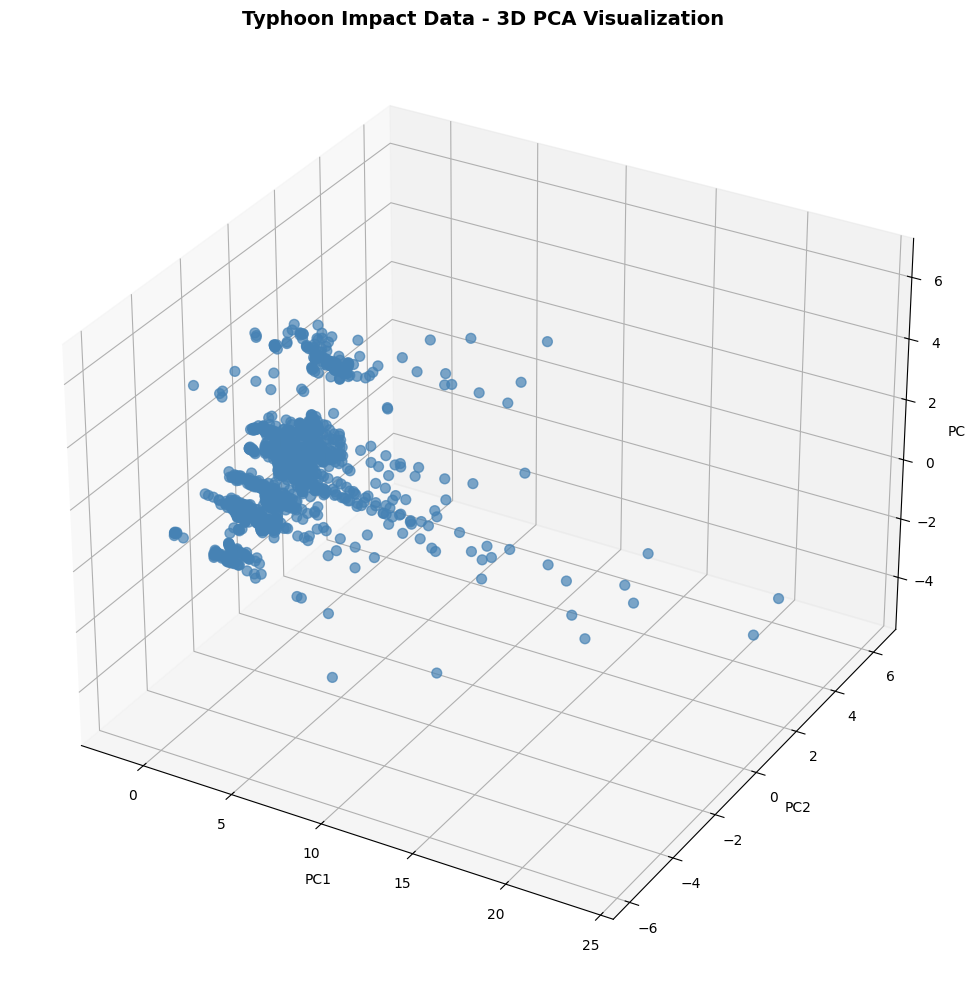

In [49]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_3d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 3D Visualization'
) -> None:
    """
    Create a 3D scatter plot of the first 3 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2, PC3)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 3D plot
    """
    pca_3d_fig = plt.figure(figsize=(12, 10))
    pca_3d_ax = pca_3d_fig.add_subplot(111, projection='3d')
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    pc3_values = pca_dataframe['PC3'].values
    
    if cluster_labels is not None:
        scatter_plot = pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_3d_fig.colorbar(scatter_plot, ax=pca_3d_ax, label='Cluster')
    else:
        pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_3d_ax.set_xlabel('PC1')
    pca_3d_ax.set_ylabel('PC2')
    pca_3d_ax.set_zlabel('PC3')
    pca_3d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_3d_fig)

# Plot 3D PCA visualization
plot_pca_3d(typhoon_pca_df, figure_title='Typhoon Impact Data - 3D PCA Visualization')

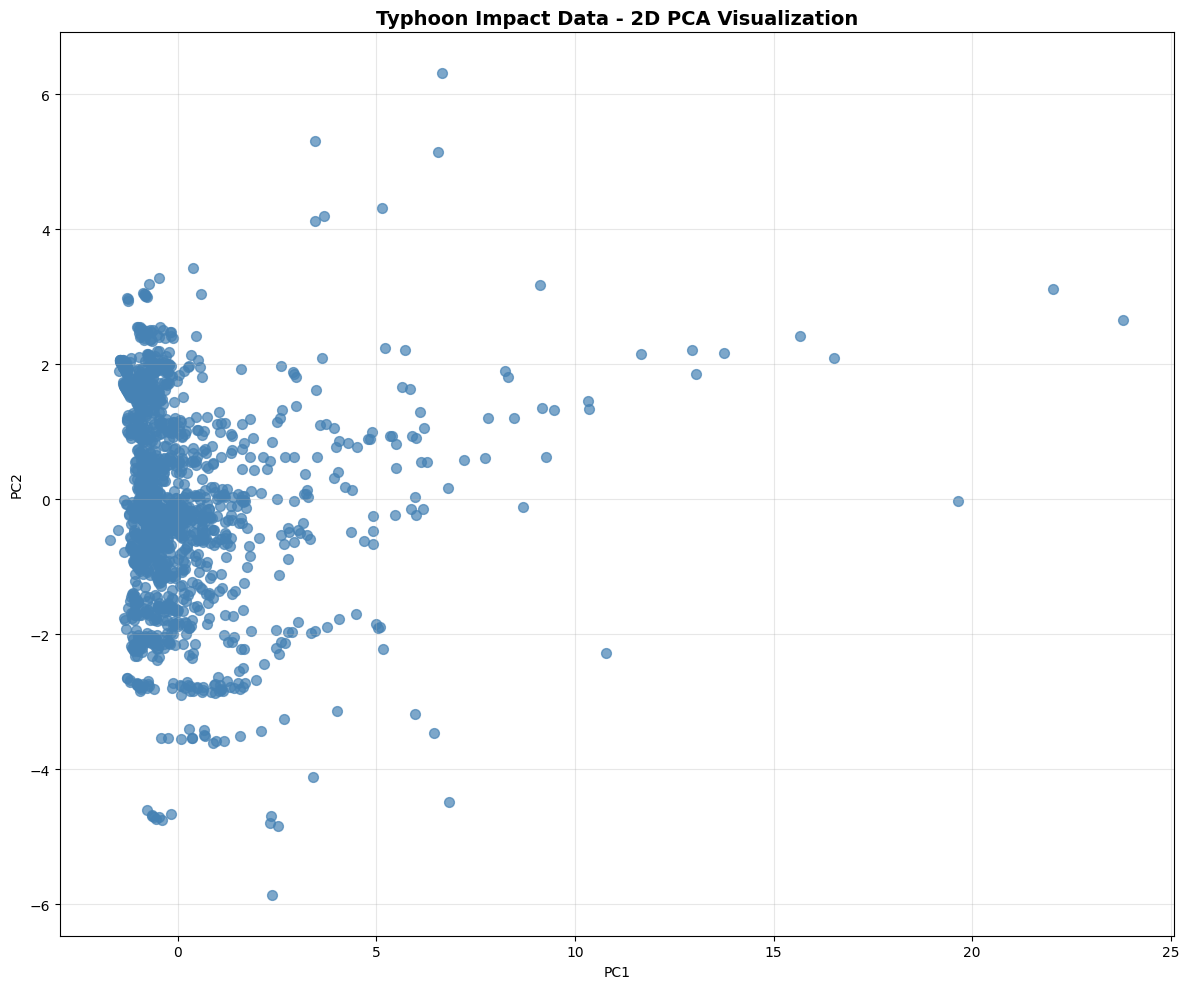

In [50]:
# 2D PCA Visualization
def plot_pca_2d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 2D Visualization'
) -> None:
    """
    Create a 2D scatter plot of the first 2 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 2D plot
    """
    pca_2d_fig, pca_2d_ax = plt.subplots(figsize=(12, 10))
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    
    if cluster_labels is not None:
        scatter_plot_2d = pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_2d_fig.colorbar(scatter_plot_2d, ax=pca_2d_ax, label='Cluster')
    else:
        pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_2d_ax.set_xlabel('PC1')
    pca_2d_ax.set_ylabel('PC2')
    pca_2d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    pca_2d_ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_2d_fig)

# Plot 2D PCA visualization
plot_pca_2d(typhoon_pca_df, figure_title='Typhoon Impact Data - 2D PCA Visualization')

## Scaling